In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import os

In [3]:
path_splits = '../splits/100_shot_split.csv'
path_jpg = Path('../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files/')

df = pd.read_csv(path_splits)
data = ImageList.from_df(df, path_jpg)
data

ImageList (44061 items)
Image (3, 2705, 2539),Image (3, 2906, 2258),Image (3, 3056, 2544),Image (3, 2544, 3056),Image (3, 3056, 2544)
Path: ../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files

In [4]:
train_idx = df.index[df['split']=='train']
valid_idx = df.index[df['split']=='validate']

data = (ImageList.from_df(df, path_jpg)
        .split_by_idxs(train_idx, valid_idx)
        .label_from_df(label_delim=',')
        .transform('', size=224)
        .databunch(bs=64)
        .normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (1300 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
Pleural Effusion,No Finding,Support Devices,Atelectasis,Pneumonia
Path: ../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files;

Valid: LabelList (3900 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
Consolidation,Pneumonia,Pleural Effusion,Cardiomegaly,Pneumothorax
Path: ../../../../scratch/rl80/mimic-cxr-jpg-2.0.0.physionet.org/files;

Test: None

In [5]:
learn = cnn_learner(data, models.densenet121, metrics=[error_rate, accuracy])

In [6]:
learn.lr_find()

epoch     train_loss  valid_loss  error_rate  accuracy  time    
0         1.063486    #na#        00:45       
1         1.058791    #na#        00:35       
2         1.022964    #na#        00:35       
3         0.837182    #na#        00:34       
4         4.073016    #na#        00:28       
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/home/ilu3/destinationPath/lib/python3.6/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


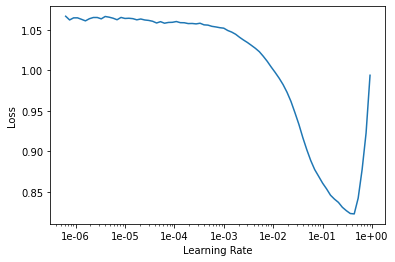

In [7]:
learn.recorder.plot()